In [2]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy

from scipy.stats import dirichlet

In [3]:
flow_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_280224_strictregularisation/output.hdf5'
kde_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/KDEs_280224_strictregularosation/output.hdf5'
flow_file = h5py.File(flow_filename, 'r')
kde_file = h5py.File(kde_filename, 'r')

Rel samples in chi_b=0. = 0.99584375
Rel samples in chi_b=0.1 = 0.00415625
Rel samples in chi_b=0.2 = 0.0
Rel samples in chi_b=0.3 = 0.0


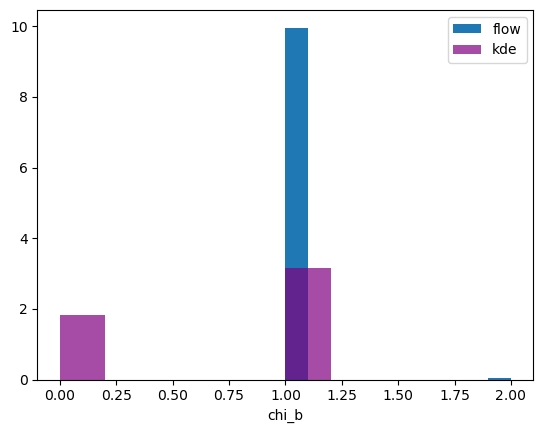

In [4]:
#relative samples in each chi_b
chi_b_samps = list(flow_file['model_selection']['samples']['block1_values'][:,0])
chi_b_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,0])

plt.hist(chi_b_samps, density=True, label='flow')
plt.hist(chi_b_samps_kde, color='Purple', density=True, label='kde', alpha=0.7)
plt.xlabel('chi_b')
plt.legend()
no_chib_samps = np.zeros(4)

#below calculation breaks if there's no samps in chi_b=0. model
for i, samps in enumerate(np.unique(chi_b_samps, return_counts=True)[1]):
    no_chib_samps[i] = samps
print(f'Rel samples in chi_b=0. = {no_chib_samps[0]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.1 = {no_chib_samps[1]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.2 = {no_chib_samps[2]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.3 = {no_chib_samps[3]/len(chi_b_samps)}')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [4]:
np.mean(chi_b_samps)

0.0158125

Rel samples in alpha=0.2 = 0.000390625
Rel samples in alpha=0.5 = 0.149453125
Rel samples in alpha=1. = 0.0405390625
Rel samples in alpha=2. = 0.078328125
Rel samples in alpha=5. = 0.7312890625


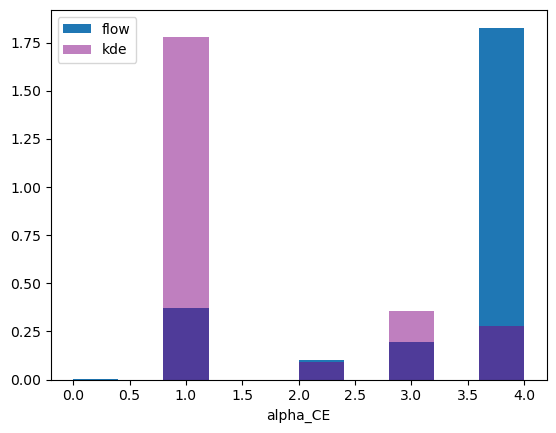

In [5]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block1_values'][:,1])
alpha_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow')
plt.hist(alpha_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('alpha_CE')
plt.legend()

no_alpha_samps = np.unique(alpha_samps, return_counts=True)[1]
print(f'Rel samples in alpha=0.2 = {no_alpha_samps[0]/len(alpha_samps)}')
print(f'Rel samples in alpha=0.5 = {no_alpha_samps[1]/len(alpha_samps)}')
print(f'Rel samples in alpha=1. = {no_alpha_samps[2]/len(alpha_samps)}')
print(f'Rel samples in alpha=2. = {no_alpha_samps[3]/len(alpha_samps)}')
print(f'Rel samples in alpha=5. = {no_alpha_samps[4]/len(alpha_samps)}')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [7]:
np.mean(alpha_samps)

2.98878125

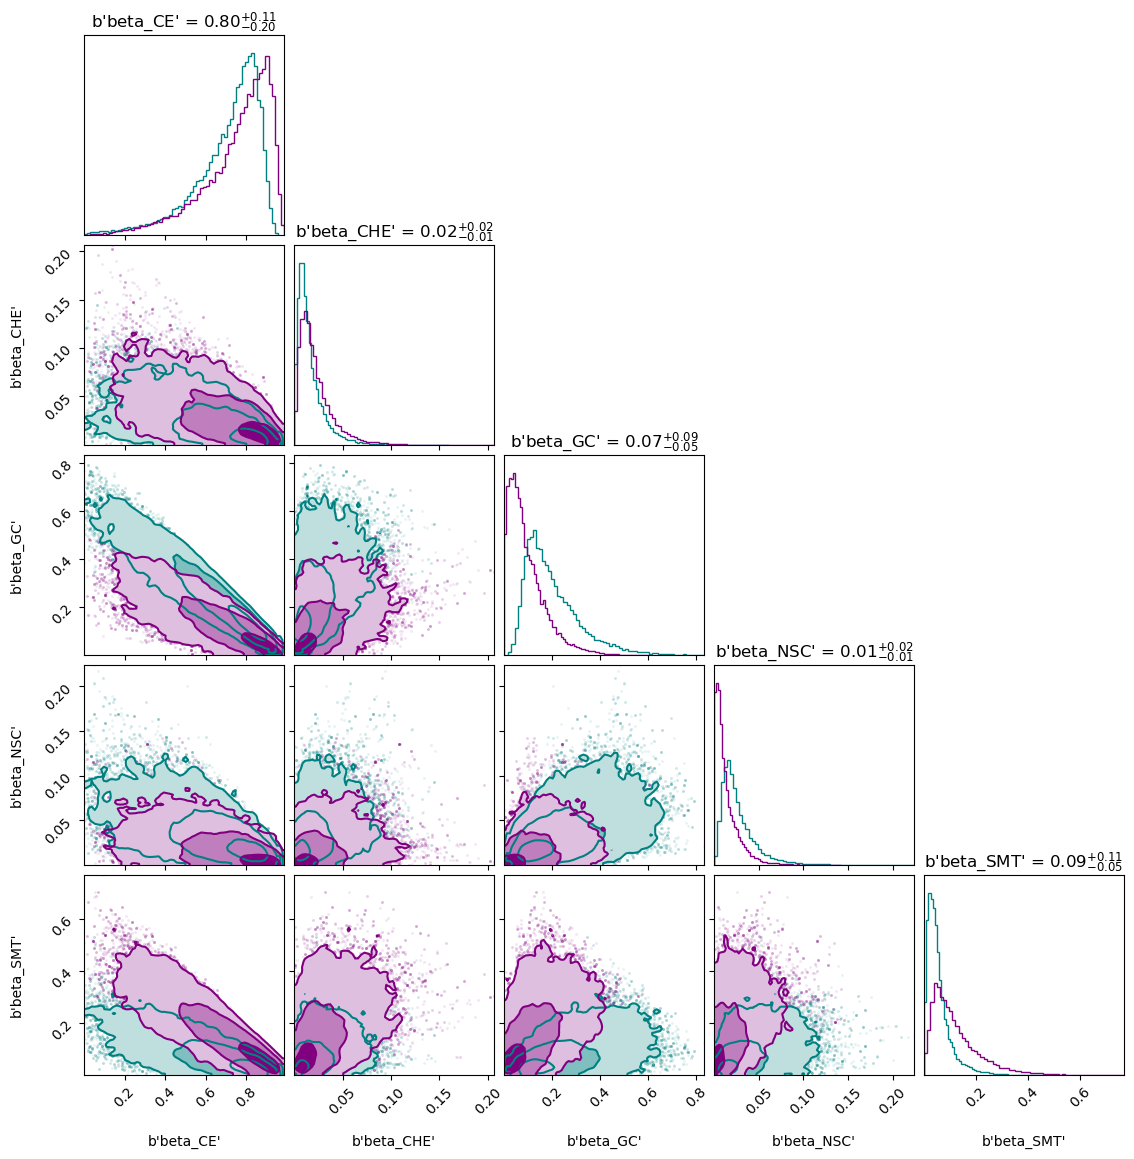

In [6]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="purple",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
)

#kwargs = deepcopy(corner_kwargs)
fig_data = corner.corner(branching_fracs, **corner_kwargs)
fig_data = corner.corner(branching_fracs_kde, fig=fig_data, **corner_kwargs_kde)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/BFs_flow_KDEcomp.pdf')

In [10]:
print(np.mean(branching_fracs, axis=0))
print(np.mean(branching_fracs_kde, axis=0))

[0.58828515 0.01687992 0.31081667 0.03617395 0.04784432]
[0.75279734 0.03067612 0.10328986 0.02966085 0.08357583]


### Log plot of branching fractions

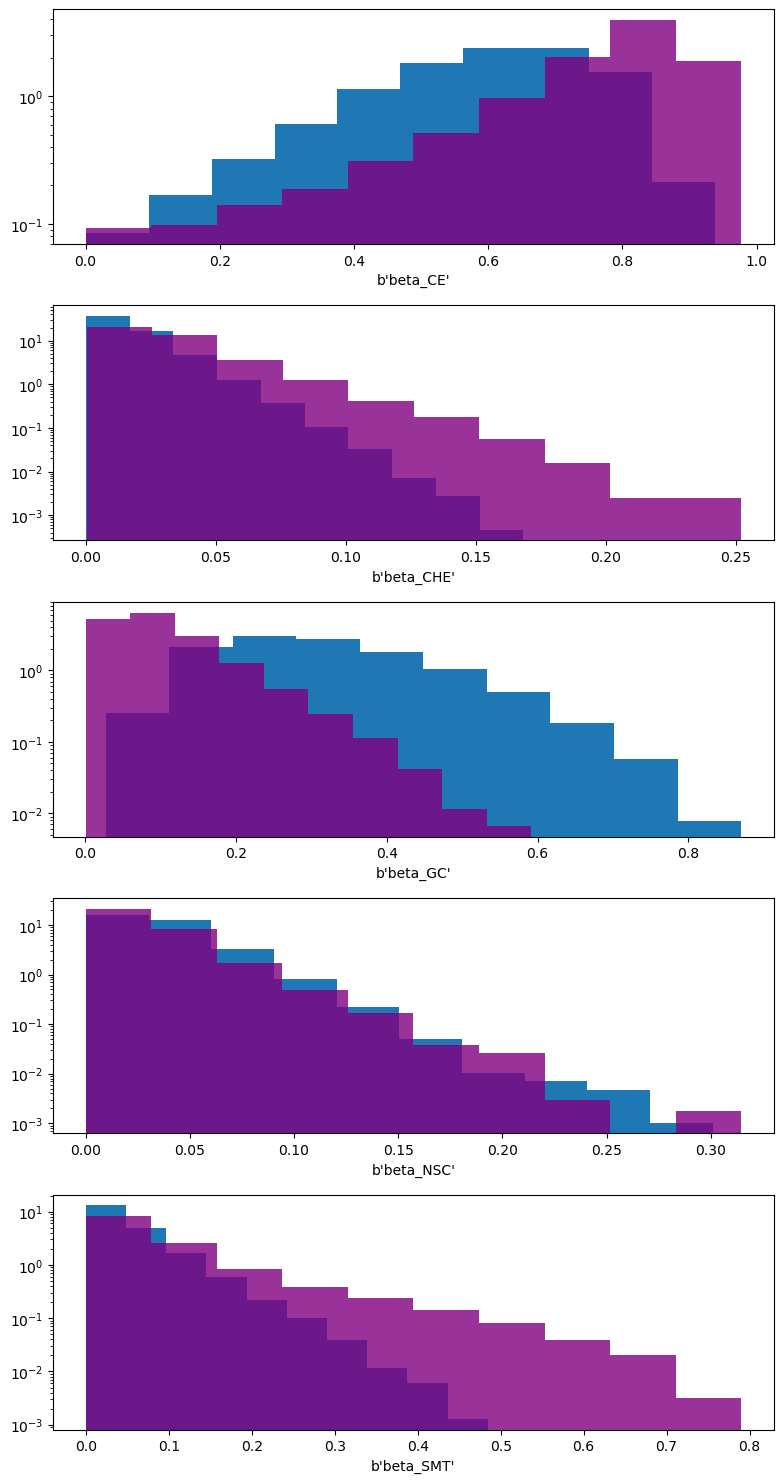

In [11]:
plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].hist(branching_fracs[:,i], density=True)
    ax[i].hist(branching_fracs_kde[:,i], density=True, color='purple', alpha=0.8)
    ax[i].set_yscale('log')
    ax[i].set_xlabel(list(flow_file['model_selection']['samples']['block0_items'])[i])
fig.tight_layout(pad=1.3)

## 4/5 events only

In [6]:
flow_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_200524_correctevents/output.hdf5'
kde_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_200524_correctevents/output.hdf5'
flow_file = h5py.File(flow_filename, 'r')
kde_file = h5py.File(kde_filename, 'r')

Rel samples in chi_b=0. = 0.97715625
Rel samples in chi_b=0.1 = 0.0121796875
Rel samples in chi_b=0.2 = 0.008
Rel samples in chi_b=0.3 = 0.0026640625


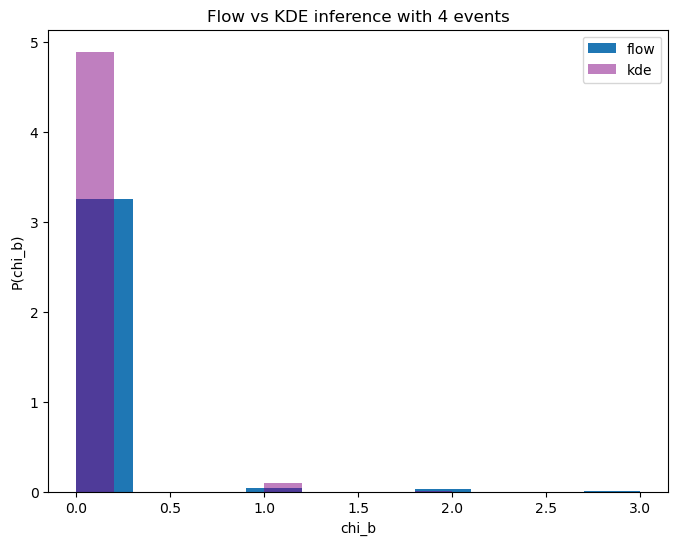

In [4]:
#relative samples in each chi_b
plt.rcParams["figure.figsize"] = (8,6)
chi_b_samps = list(flow_file['model_selection']['samples']['block1_values'][:,0])
chi_b_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,0])

plt.hist(chi_b_samps, density=True, label='flow')
plt.hist(chi_b_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('chi_b')
plt.ylabel('P(chi_b)')
plt.legend()
plt.title('Flow vs KDE inference with 4 events')
no_chib_samps = np.zeros(4)
for i, samps in enumerate(np.unique(chi_b_samps, return_counts=True)[1]):
    no_chib_samps[i] = samps
print(f'Rel samples in chi_b=0. = {no_chib_samps[0]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.1 = {no_chib_samps[1]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.2 = {no_chib_samps[2]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.3 = {no_chib_samps[3]/len(chi_b_samps)}')

Rel samples in alpha=0.2 = 0.09578125
Rel samples in alpha=0.5 = 0.2231328125
Rel samples in alpha=1. = 0.2333046875
Rel samples in alpha=2. = 0.243390625
Rel samples in alpha=5. = 0.204390625


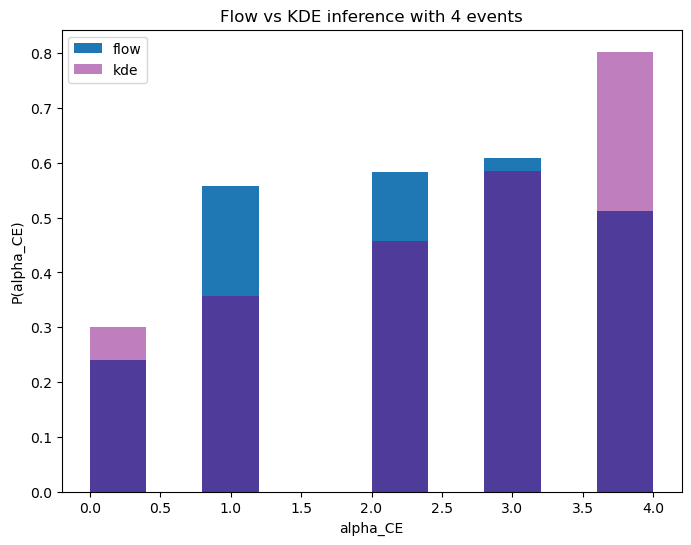

In [5]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block1_values'][:,1])
alpha_samps_kde = list(kde_file['model_selection']['samples']['block1_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow')
plt.hist(alpha_samps_kde, color='Purple', density=True, label='kde', alpha=0.5)
plt.xlabel('alpha_CE')
plt.ylabel('P(alpha_CE)')
plt.legend()

plt.title('Flow vs KDE inference with 4 events')

no_alpha_samps = np.unique(alpha_samps, return_counts=True)[1]
print(f'Rel samples in alpha=0.2 = {no_alpha_samps[0]/len(alpha_samps)}')
print(f'Rel samples in alpha=0.5 = {no_alpha_samps[1]/len(alpha_samps)}')
print(f'Rel samples in alpha=1. = {no_alpha_samps[2]/len(alpha_samps)}')
print(f'Rel samples in alpha=2. = {no_alpha_samps[3]/len(alpha_samps)}')
print(f'Rel samples in alpha=5. = {no_alpha_samps[4]/len(alpha_samps)}')

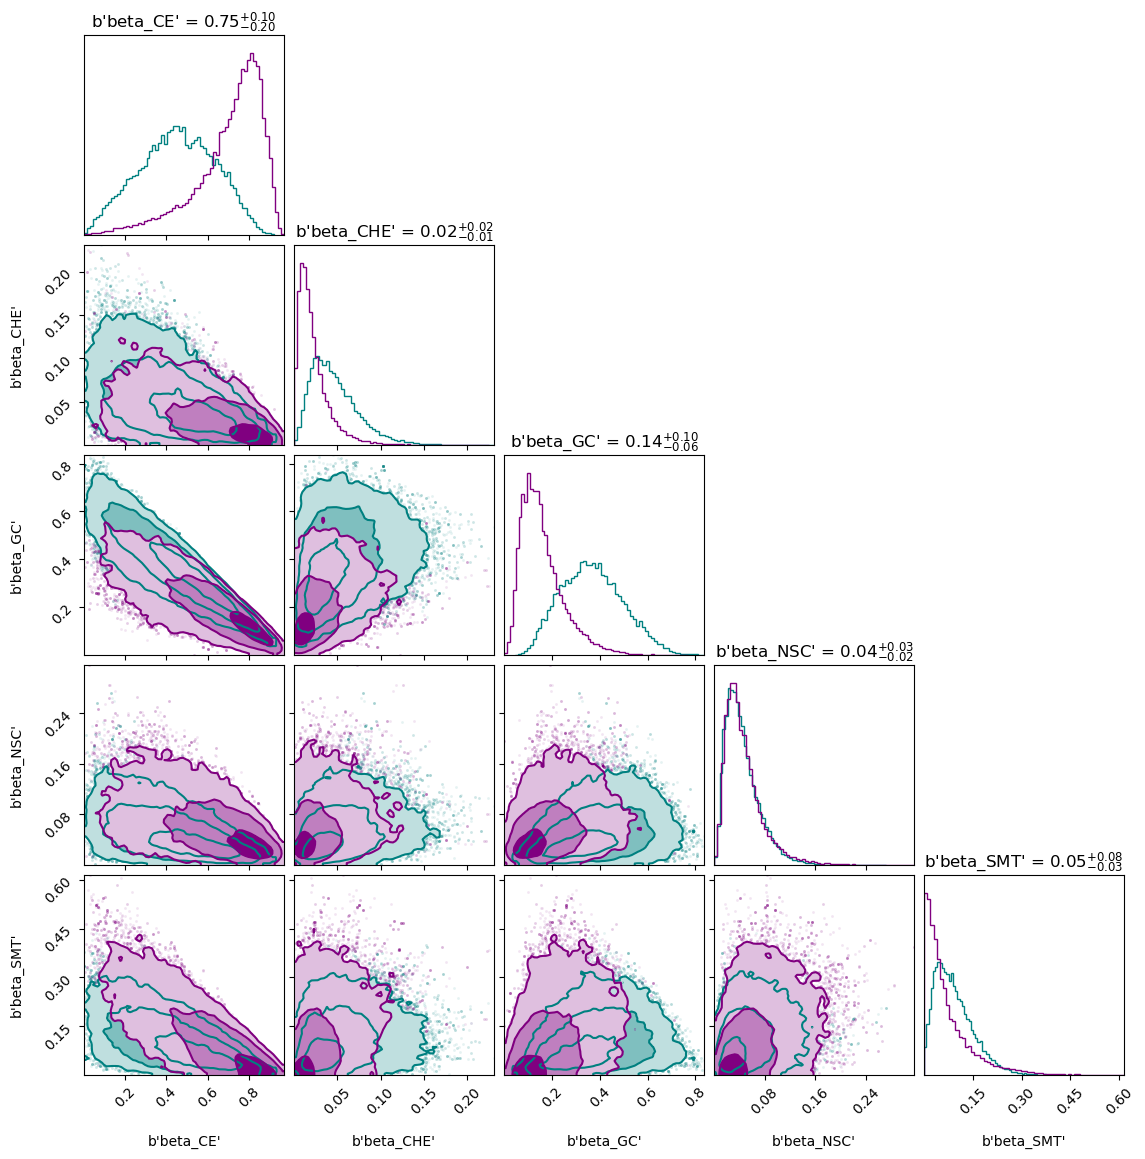

In [7]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_kde = np.array(kde_file['model_selection']['samples']['block0_values'])
chib_alpha = np.array(flow_file['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="purple",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
)

#kwargs = deepcopy(corner_kwargs)
fig_data = corner.corner(branching_fracs, **corner_kwargs)
fig_data = corner.corner(branching_fracs_kde, fig=fig_data, **corner_kwargs_kde)

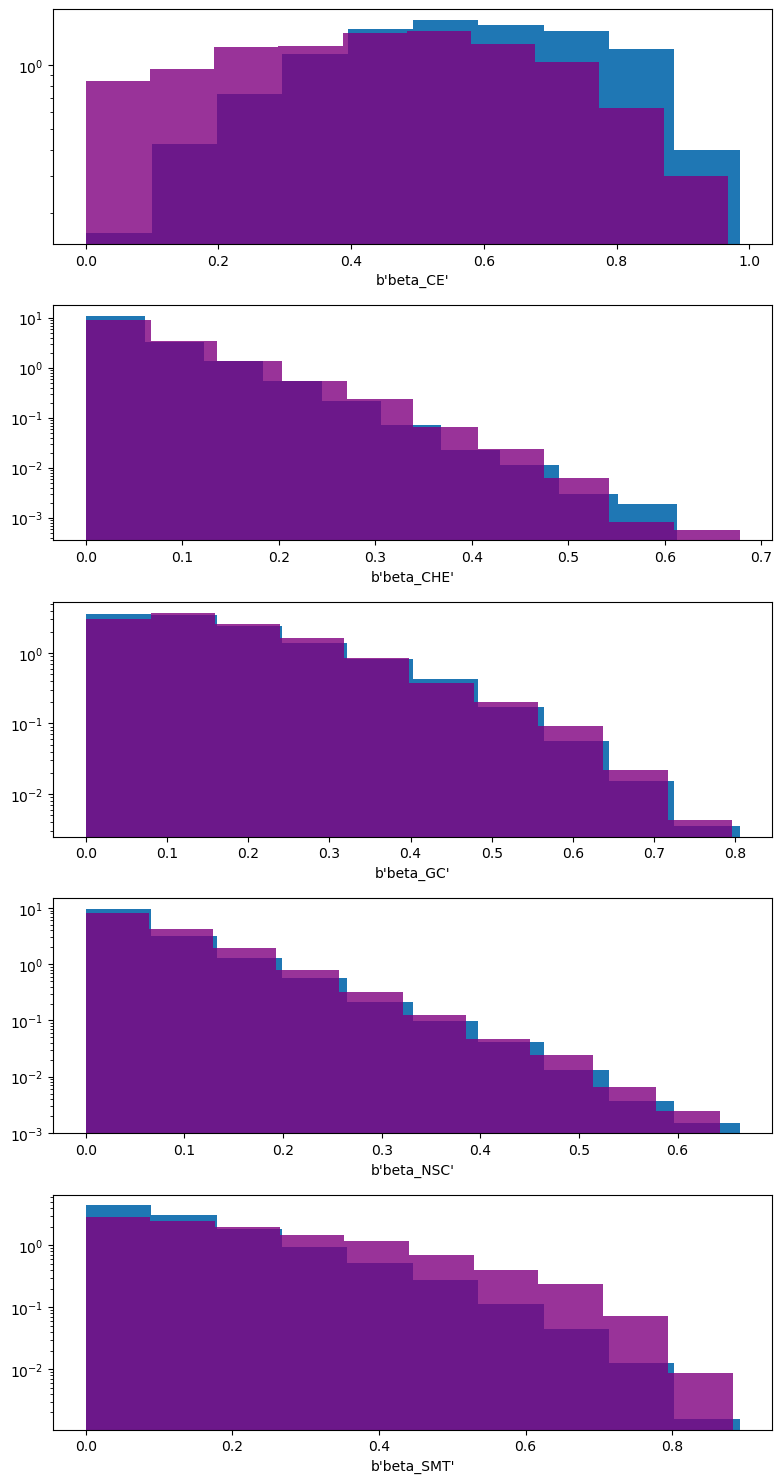

In [8]:
plt.rcParams["figure.figsize"] = (8,15)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].hist(branching_fracs[:,i], density=True)
    ax[i].hist(branching_fracs_kde[:,i], density=True, color='purple', alpha=0.8)
    ax[i].set_yscale('log')
    ax[i].set_xlabel(list(flow_file['model_selection']['samples']['block0_items'])[i])
fig.tight_layout(pad=1.3)

In [3]:
import sys
sys.path.append('../')
from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.bbh_models import read_hdf5
from populations import gw_obs
import seaborn as sns
cp = sns.color_palette("colorblind", 6)


/data/wiay/2297403c/conda_envs/amaze/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


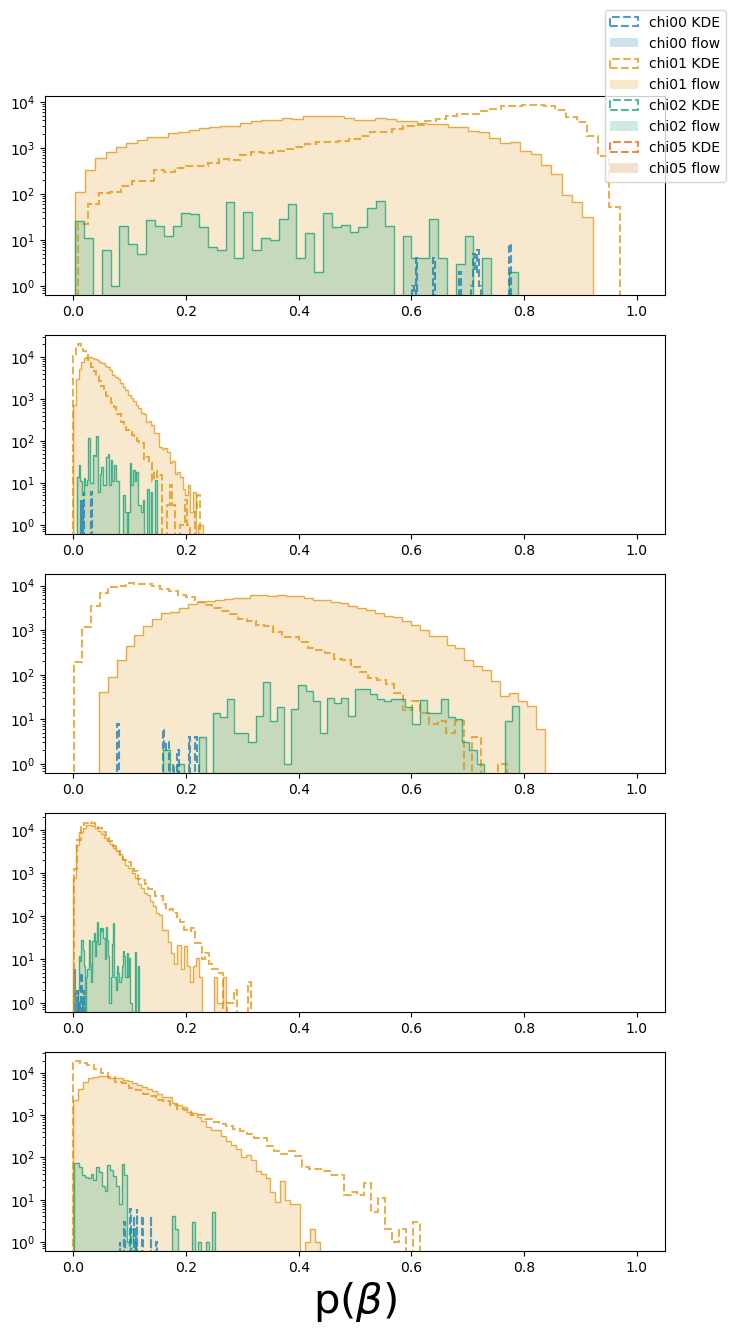

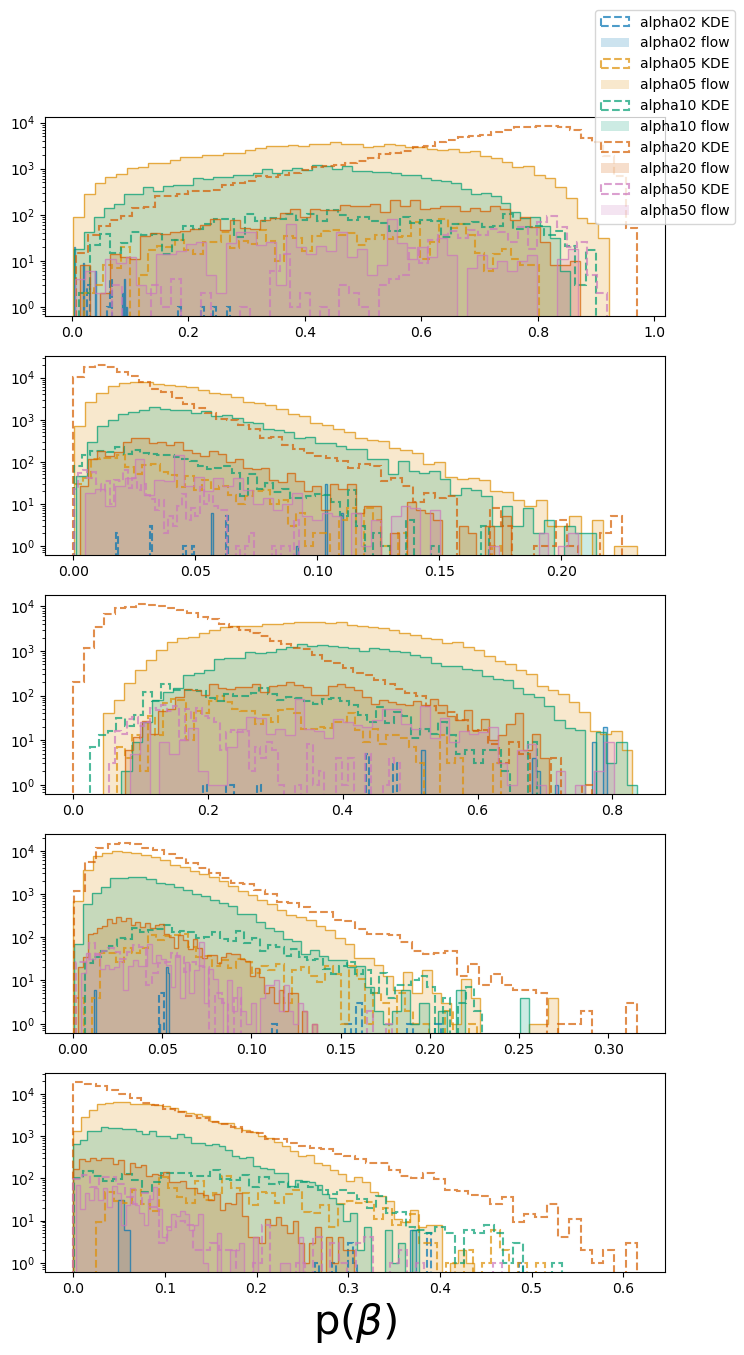

In [21]:
plt.rcParams["figure.figsize"] = (8,15)
kde_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_200524_correctevents/output.hdf5', 'r')
KDE_samples_allchains = np.hstack([kde_file['model_selection']['samples']['block1_values'], kde_file['model_selection']['samples']['block0_values']])
flow_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_200524_correctevents/output.hdf5', 'r')
flow_samples_allchains = np.hstack([flow_file['model_selection']['samples']['block1_values'], flow_file['model_selection']['samples']['block0_values']])

channels = ['CE','CHE','GC','NSC','SMT']

h_max = 0
submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
Nhyper =2


for hyper_idx in [0,1]:
    basemdl_samps_kde = len(np.argwhere(KDE_samples_allchains[:,hyper_idx]==0).flatten())
    basemdl_samps_flow = len(np.argwhere(flow_samples_allchains[:,hyper_idx]==0).flatten())

    fig, ax_margs = plt.subplots(5)
    for midx, model in submodels_dict[hyper_idx].items():
        kde_smdl_locs = np.argwhere(KDE_samples_allchains[:,hyper_idx]==midx).flatten()
        flow_smdl_locs = np.argwhere(flow_samples_allchains[:,hyper_idx]==midx).flatten()

        mdl_samps = len(kde_smdl_locs)
        """if basemdl_samps > 0:
            BF = float(mdl_samps)/basemdl_samps
        else:
            BF = float(mdl_samps)"""
        for cidx, channel in enumerate(channels):
            h, bins, _ = ax_margs[cidx].hist(KDE_samples_allchains[kde_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, ls='--', lw=1.5, \
                alpha=0.7, label=model+' KDE')

            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, \
                alpha=0.7)
            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='stepfilled', color=cp[midx], bins=50, \
                alpha=0.2, label=model+' flow')
            h_max = h.max() if h.max() > h_max else h_max

    # format plot
    for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):

        # legend
        if cidx == 0:
            ax_marg.legend(loc='center', bbox_to_anchor=[1.0,1.0], prop={'size':10})

        if cidx == len(channels)-1:
            ax_marg.set_xlabel(r"p($\beta$)", fontsize=30)

        ax_marg.set_yscale('log')
    plt.show()

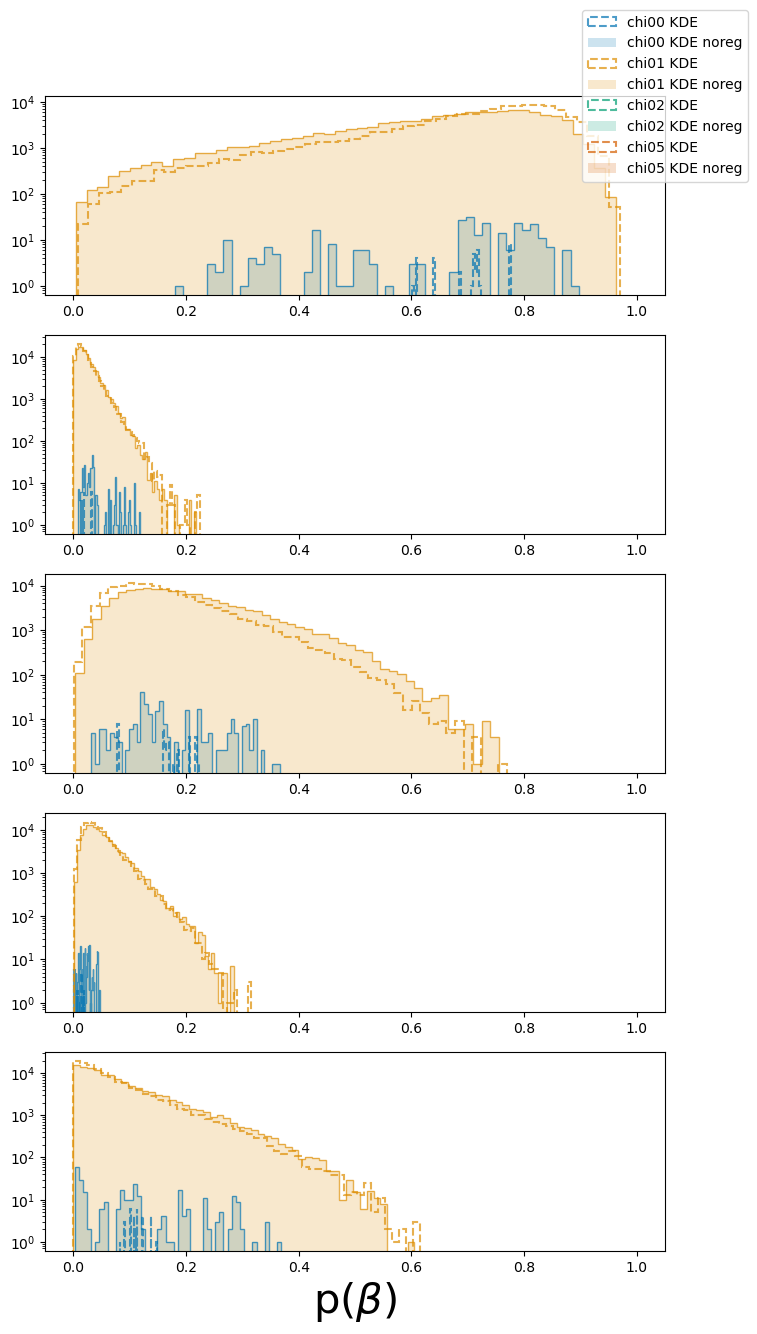

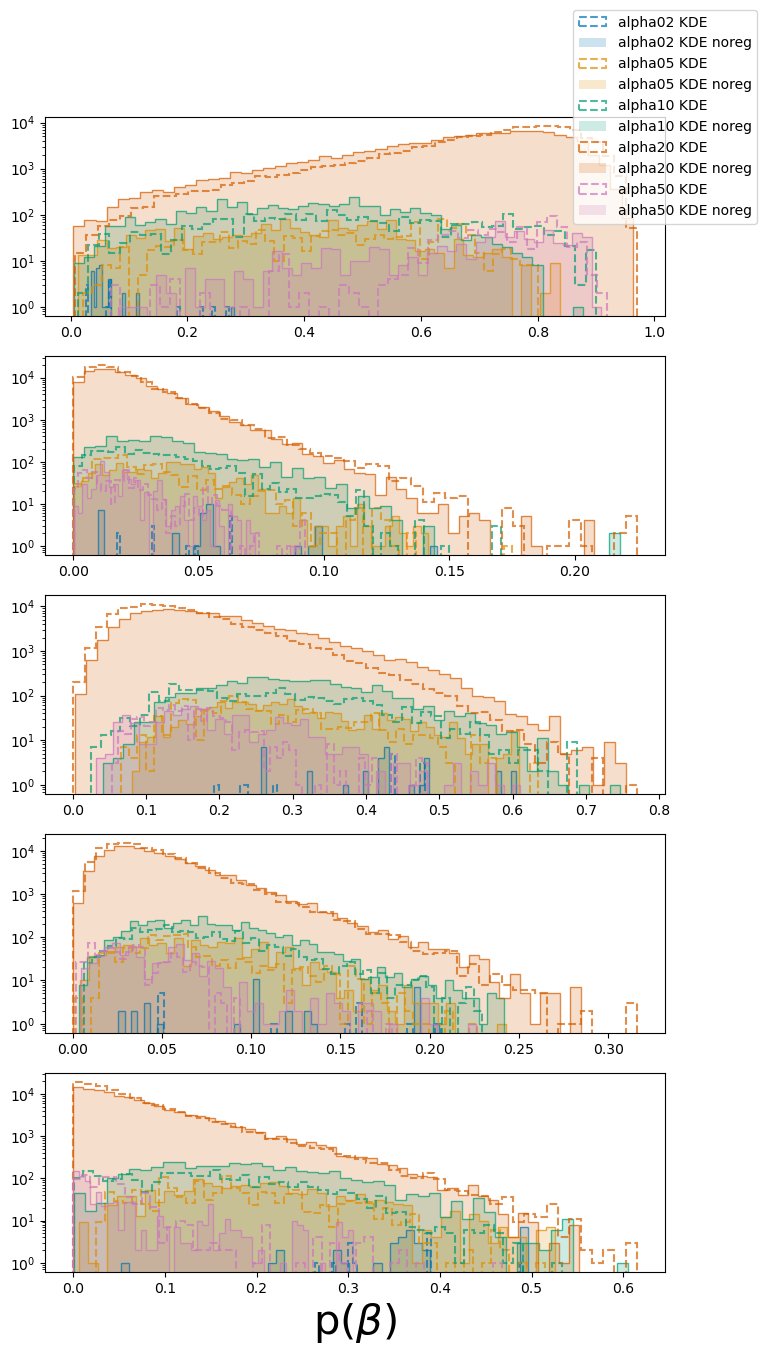

In [4]:
plt.rcParams["figure.figsize"] = (8,15)
kde_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_200524_correctevents/output.hdf5', 'r')
KDE_samples_allchains = np.hstack([kde_file['model_selection']['samples']['block1_values'], kde_file['model_selection']['samples']['block0_values']])
flow_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_200524_noreg_correctevents/output.hdf5', 'r')
flow_samples_allchains = np.hstack([flow_file['model_selection']['samples']['block1_values'], flow_file['model_selection']['samples']['block0_values']])

channels = ['CE','CHE','GC','NSC','SMT']

h_max = 0
submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
Nhyper =2


for hyper_idx in [0,1]:
    basemdl_samps_kde = len(np.argwhere(KDE_samples_allchains[:,hyper_idx]==0).flatten())
    basemdl_samps_flow = len(np.argwhere(flow_samples_allchains[:,hyper_idx]==0).flatten())

    fig, ax_margs = plt.subplots(5)
    for midx, model in submodels_dict[hyper_idx].items():
        kde_smdl_locs = np.argwhere(KDE_samples_allchains[:,hyper_idx]==midx).flatten()
        flow_smdl_locs = np.argwhere(flow_samples_allchains[:,hyper_idx]==midx).flatten()

        mdl_samps = len(kde_smdl_locs)
        """if basemdl_samps > 0:
            BF = float(mdl_samps)/basemdl_samps
        else:
            BF = float(mdl_samps)"""
        for cidx, channel in enumerate(channels):
            h, bins, _ = ax_margs[cidx].hist(KDE_samples_allchains[kde_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, ls='--', lw=1.5, \
                alpha=0.7, label=model+' KDE')

            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, \
                alpha=0.7)
            h, bins, _ = ax_margs[cidx].hist(flow_samples_allchains[flow_smdl_locs, cidx+Nhyper], \
                histtype='stepfilled', color=cp[midx], bins=50, \
                alpha=0.2, label=model+' KDE noreg')
            h_max = h.max() if h.max() > h_max else h_max

    # format plot
    for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):

        # legend
        if cidx == 0:
            ax_marg.legend(loc='center', bbox_to_anchor=[1.0,1.0], prop={'size':10})

        if cidx == len(channels)-1:
            ax_marg.set_xlabel(r"p($\beta$)", fontsize=30)

        ax_marg.set_yscale('log')
    plt.savefig(f'KDE_logBFs{hyper_idx}.pdf')
    plt.show()

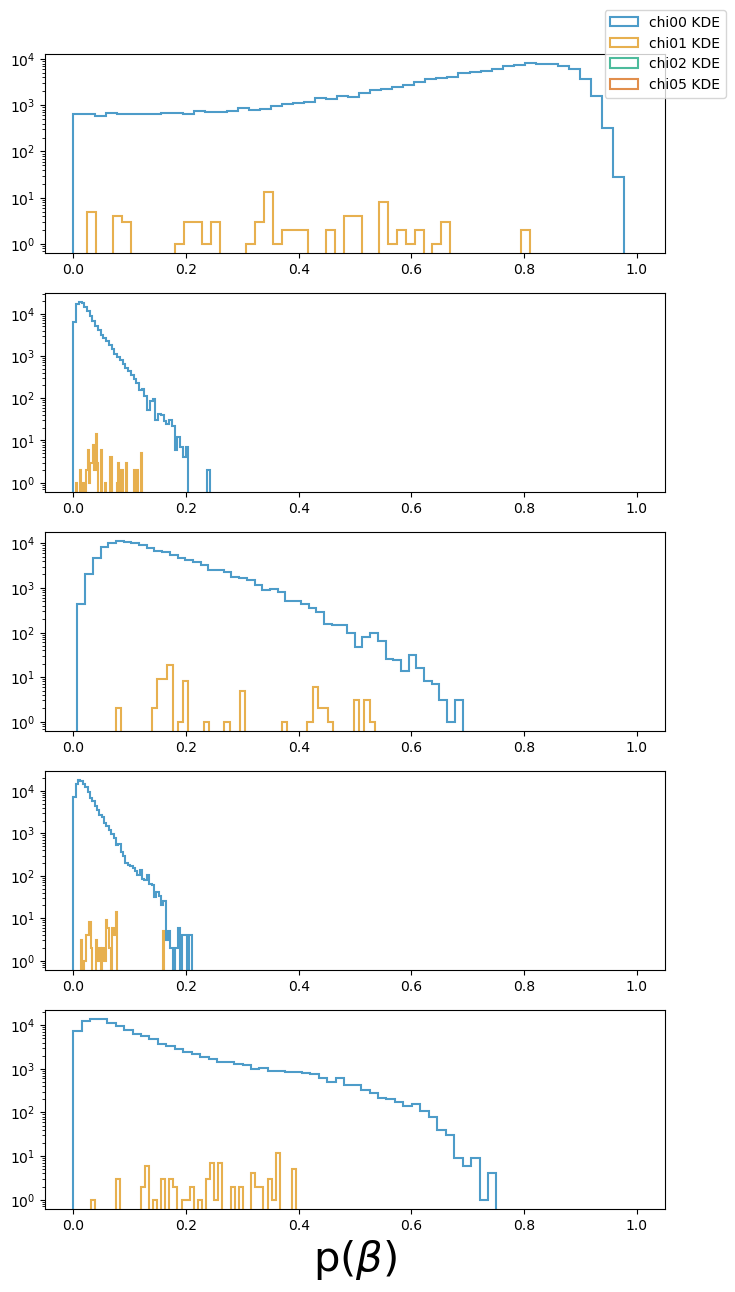

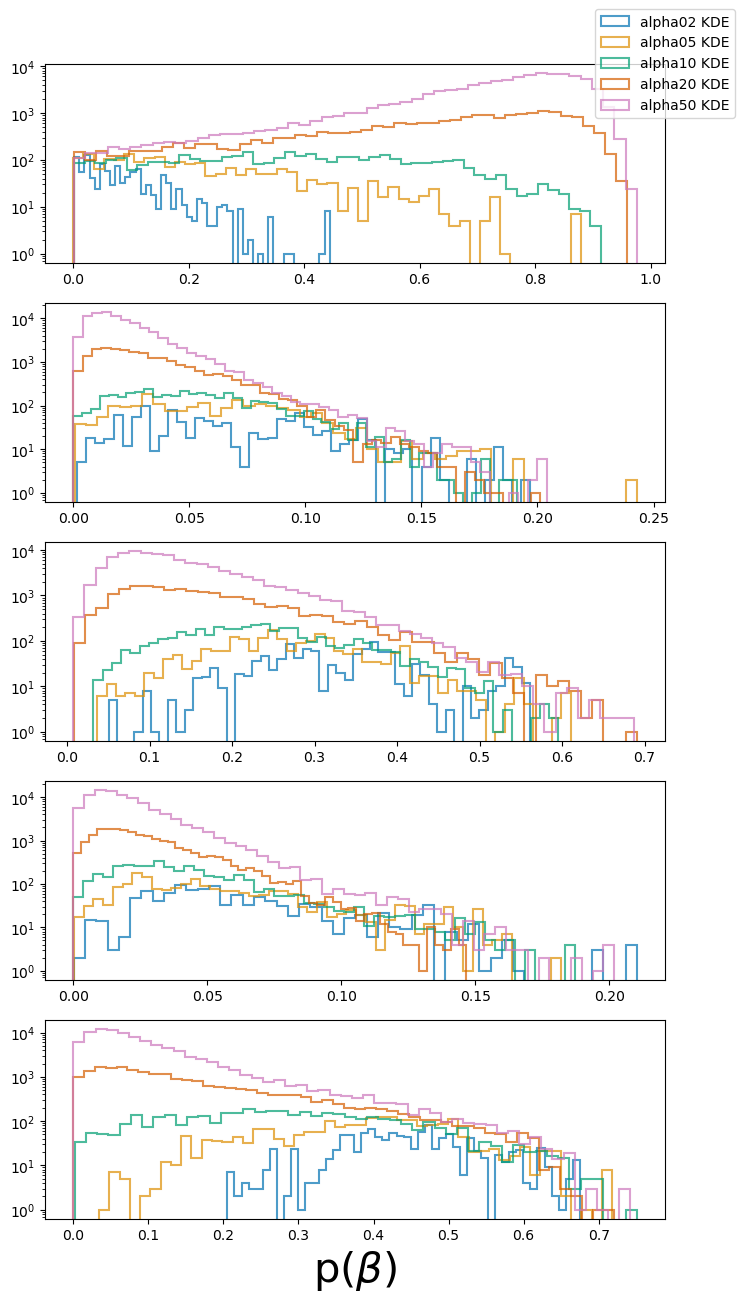

In [6]:
plt.rcParams["figure.figsize"] = (8,15)
kde_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_220524_actcorrectevents/output.hdf5', 'r')
KDE_samples_allchains = np.hstack([kde_file['model_selection']['samples']['block1_values'], kde_file['model_selection']['samples']['block0_values']])
flow_file = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/KDEs_200524_noreg_correctevents/output.hdf5', 'r')
flow_samples_allchains = np.hstack([flow_file['model_selection']['samples']['block1_values'], flow_file['model_selection']['samples']['block0_values']])

channels = ['CE','CHE','GC','NSC','SMT']

h_max = 0
submodels_dict= {0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, \
 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}
Nhyper =2


for hyper_idx in [0,1]:
    basemdl_samps_kde = len(np.argwhere(KDE_samples_allchains[:,hyper_idx]==0).flatten())
    basemdl_samps_flow = len(np.argwhere(flow_samples_allchains[:,hyper_idx]==0).flatten())

    fig, ax_margs = plt.subplots(5)
    for midx, model in submodels_dict[hyper_idx].items():
        kde_smdl_locs = np.argwhere(KDE_samples_allchains[:,hyper_idx]==midx).flatten()
        flow_smdl_locs = np.argwhere(flow_samples_allchains[:,hyper_idx]==midx).flatten()

        mdl_samps = len(kde_smdl_locs)
        """if basemdl_samps > 0:
            BF = float(mdl_samps)/basemdl_samps
        else:
            BF = float(mdl_samps)"""
        for cidx, channel in enumerate(channels):
            h, bins, _ = ax_margs[cidx].hist(KDE_samples_allchains[kde_smdl_locs, cidx+Nhyper], \
                histtype='step', color=cp[midx], bins=50, ls='-', lw=1.5, \
                alpha=0.7, label=model+' KDE')


    # format plot
    for cidx, (channel, ax_marg) in enumerate(zip(channels, ax_margs)):

        # legend
        if cidx == 0:
            ax_marg.legend(loc='center', bbox_to_anchor=[1.0,1.0], prop={'size':10})

        if cidx == len(channels)-1:
            ax_marg.set_xlabel(r"p($\beta$)", fontsize=30)

        ax_marg.set_yscale('log')
    plt.savefig(f'KDE_logBFs{hyper_idx}.pdf')
    plt.show()